문제 주제

학생의 과목별 성적 분석 및 시각화 프로그램 개발

문제 내용

20명의 학생의 수학, 영어, 과학 점수를 분석하여 다음 작업을 수행합니다.

학생 성적 분석 프로그램을 StudentScoreAnalysis 클래스로 개발합니다.

분석 요구사항

- 과목별 평균 점수를 계산하고 막대 그래프로 시각화 합니다.
- 평균 성적 상위 5명의 학생을 막대 그래프로 시각화 합니다.
- 학생 데이터 생성 ( __init__ )
    - 학생의 이름, 수학, 영어, 과학 성적을 포함하는 데이터프레임을 생성합니다.
    - 이름: '학생1'부터 '학생20'까지의 이름을 생성합니다.
    - 예: ['학생1', '학생2', ..., '학생20']

수학, 영어, 과학: 50부터 100 사이의 정수 난수를 20개 생성하여 각 과목의 점수를 할당합니다.

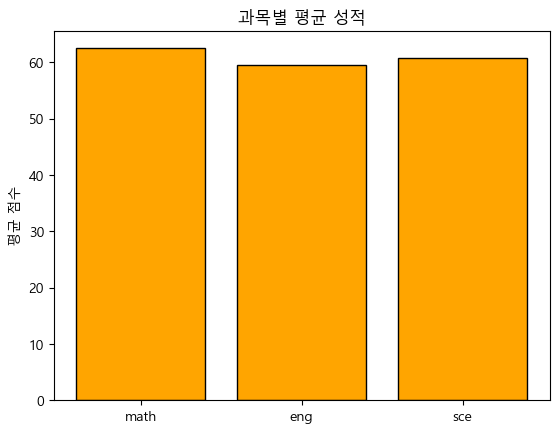

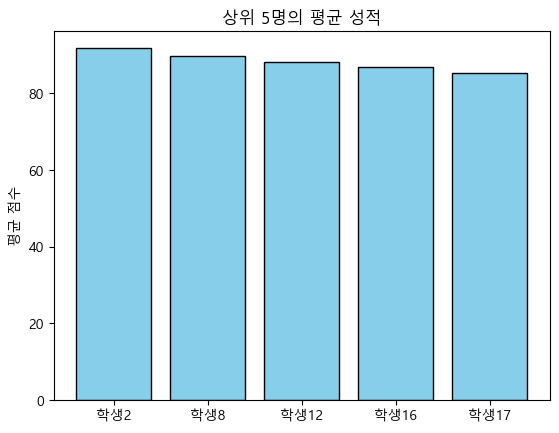

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class StudentScoreAnalysis:
    def __init__(self):
        name = [] 
        math = [] 
        eng = [] 
        sce = []
        for i in range(1, 21):
            name.append(f'학생{i}')
            math.append(np.random.randint(50, 100))
            eng.append(np.random.randint(50, 100))
            sce.append(np.random.randint(50, 100))

        data = {
            'name' : name,
            'math' : math,
            'eng' : eng,
            'sce' : sce
        }
        self.df = pd.DataFrame(data)
    
    def sub_mean(self):
        sub_mean = self.df.describe().mean()

        x = []
        y = []

        for sub,mean in sub_mean.items():
            x.append(sub)
            y.append(mean)

        plt.bar(x, y, color='orange', edgecolor='black')

        # 그래프 설정
        plt.title('과목별 평균 성적')
        plt.ylabel('평균 점수')

        #그래프 출력
        plt.show()

    def top5_stu(self):
        self.df['mean'] = self.df.groupby('name')[['math', 'eng', 'sce']].transform('sum').mean(axis=1)
        top5 = self.df.sort_values(by='mean', ascending=False).head()

        plt.bar(top5['name'], top5['mean'], color='skyblue', edgecolor='black')

        # 그래프 설정
        plt.title('상위 5명의 평균 성적')
        plt.ylabel('평균 점수')

        #그래프 출력
        plt.show()
if __name__ == '__main__' :
    students = StudentScoreAnalysis()
    students.sub_mean()
    students.top5_stu()

In [58]:
import numpy as np
import pandas as pd

data = {
    'name' : [],
    'math' : [],
    'eng' : [],
    'sce' : []
}
for i in range(1, 21):
    data['name'] = f'학생{i}'
    data['math'] = np.random.randint(50, 100)
    data['eng'] = np.random.randint(50, 100)
    data['sce'] = np.random.randint(50, 100)

data

{'name': '학생20', 'math': 78, 'eng': 56, 'sce': 82}

In [59]:
name = []
math = []
eng = []
sce = []
for i in range(1, 21):
    name.append(f'학생{i}')
    math.append(np.random.randint(50, 100))
    eng.append(np.random.randint(50, 100))
    sce.append(np.random.randint(50, 100))

data = {
    'name' : name,
    'math' : math,
    'eng' : eng,
    'sce' : sce
}
df = pd.DataFrame(data)

math    56.395206
eng     61.554729
sce     59.510975
dtype: float64 <class 'pandas.core.series.Series'>


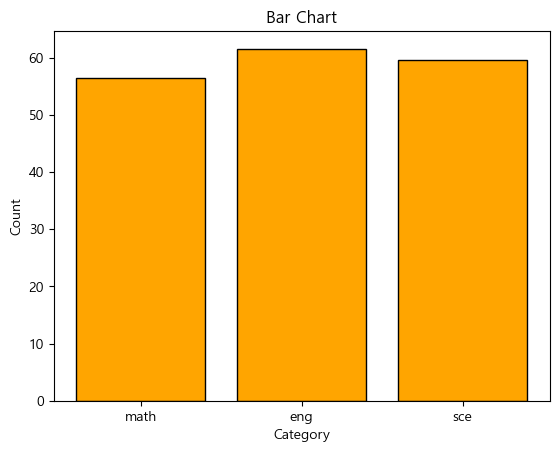

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sub_mean = df.describe().mean()
print(sub_mean, type(sub_mean))

x = []
y = []

for sub,mean in sub_mean.items():
    x.append(sub)
    y.append(mean)

plt.bar(x, y, color='orange', edgecolor='black')

# 그래프 설정
plt.title('Bar Chart')
plt.xlabel('Category')
plt.ylabel('Count')

#그래프 출력
plt.show()

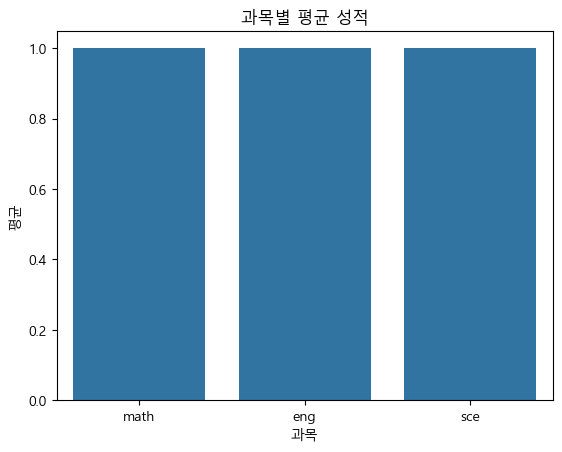

In [46]:
sub_mean = df.describe().mean()

x = []
y = []

for sub,mean in sub_mean.items():
    x.append(sub)
    y.append(mean)

data = {
    'sub' : x,
    'mean' : y
}
df2 = pd.DataFrame(data)
plt.rc('font', family='Malgun Gothic')
sns.countplot(x='sub', data=df2)
plt.title('과목별 평균 성적')
plt.xlabel('과목')
plt.ylabel('평균')
plt.show()

In [ ]:
sorted_df = df.sort_values(by='count', ascending=False)
sorted_df

In [55]:
df['mean'] = df.groupby('name')(['eng','math']).transform('sum')

TypeError: 'DataFrameGroupBy' object is not callable

In [65]:
df['mean'] = df.groupby('name')[['math', 'eng', 'sce']].transform('sum').mean(axis=1)
top5 = df.sort_values(by='mean', ascending=False).head()
print(top5)

    name  math  eng  sce       mean
15  학생16    90   68   93  83.666667
12  학생13    75   78   87  80.000000
17  학생18    83   87   69  79.666667
10  학생11    58   96   79  77.666667
5    학생6    67   87   78  77.333333


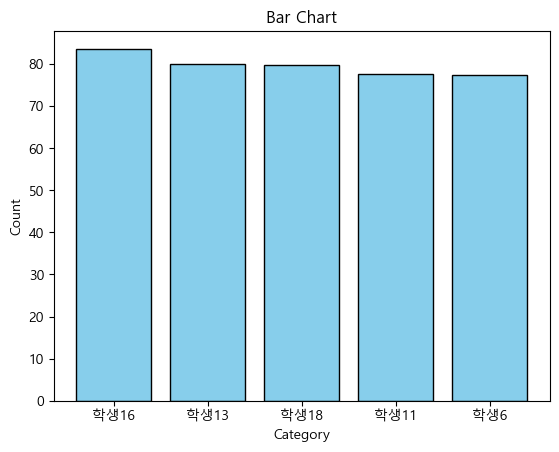

In [67]:
plt.bar(top5['name'], top5['mean'], color='skyblue', edgecolor='black')

# 그래프 설정
plt.title('Bar Chart')
plt.xlabel('Category')
plt.ylabel('Count')

#그래프 출력
plt.show()